In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
data = pd.read_csv('rerouting1.txt')
data = data[data.obj < 0.7e6] # Remove absolutely awful results
data.fss = data.fss.apply(lambda x: x.strip("' "))
data.lsm = data.lsm.apply(lambda x: x.strip("' "))
data

,obj,time,fss,lsm,tlim,instance
0,621946,1.012568,ALL_UNPERFORMED,AUTOMATIC,1,0
1,582488,1.004119,ALL_UNPERFORMED,AUTOMATIC,1,1
2,582015,1.005098,ALL_UNPERFORMED,AUTOMATIC,1,2
3,631400,1.003158,ALL_UNPERFORMED,AUTOMATIC,1,3
4,631624,1.004627,ALL_UNPERFORMED,AUTOMATIC,1,4
...,...,...,...,...,...,...
160,601730,0.928968,SEQUENTIAL_CHEAPEST_INSERTION,AUTOMATIC,20,0
161,521696,1.475793,SEQUENTIAL_CHEAPEST_INSERTION,AUTOMATIC,20,1
162,572101,1.611845,SEQUENTIAL_CHEAPEST_INSERTION,AUTOMATIC,20,2
163,472308,2.558543,SEQUENTIAL_CHEAPEST_INSERTION,AUTOMATIC,20,3


<AxesSubplot:xlabel='time', ylabel='obj'>

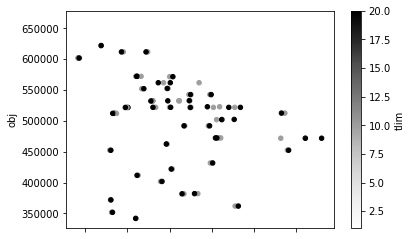

In [4]:
data.plot.scatter('time', 'obj', c='tlim')

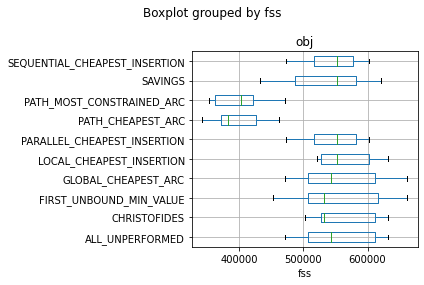

In [5]:
data.boxplot('obj','fss', vert=False)
plt.tight_layout()

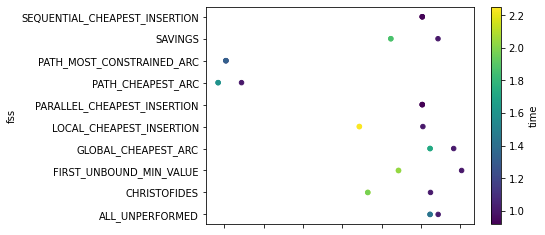

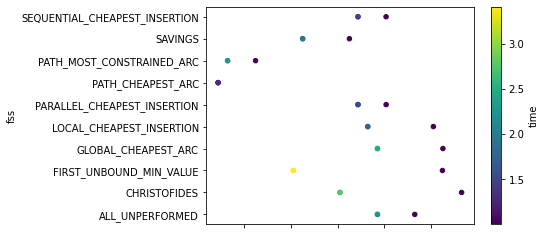

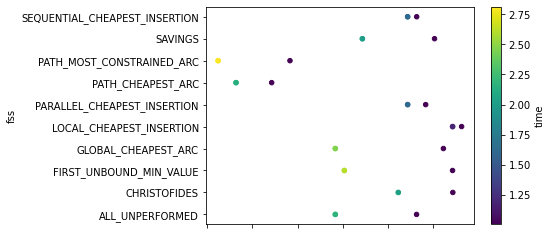

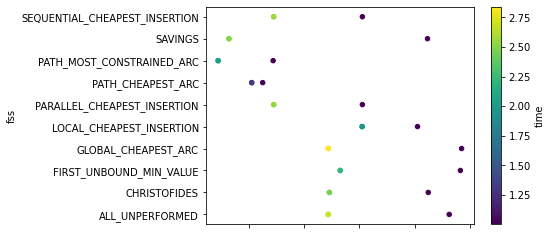

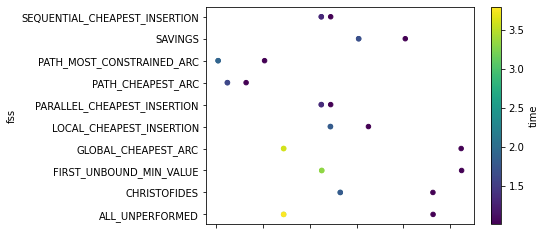

In [6]:
for i in range(5):
    data2 = data[data.instance == i]
    data2.plot.scatter('obj','fss', c='time', cmap='viridis')


<AxesSubplot:xlabel='obj', ylabel='tlim'>

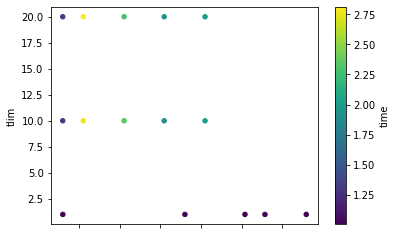

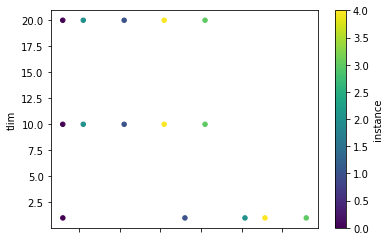

In [7]:
data2 = data[data.fss == 'PATH_MOST_CONSTRAINED_ARC']
data2.plot.scatter('obj', 'tlim', c='time', cmap='viridis')
data2.plot.scatter('obj', 'tlim', c='instance', cmap='viridis')

<AxesSubplot:xlabel='obj', ylabel='tlim'>

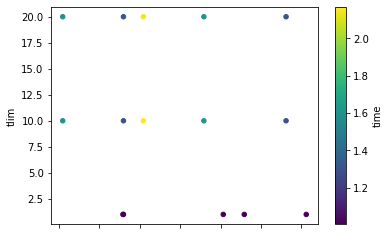

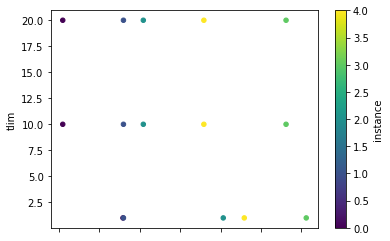

In [8]:
data2 = data[data.fss == 'PATH_CHEAPEST_ARC']
data2.plot.scatter('obj', 'tlim', c='time', cmap='viridis')
data2.plot.scatter('obj', 'tlim', c='instance', cmap='viridis')

In [9]:
data = pd.read_csv('rerouting2.txt')
data = data[data.obj < 0.7e6] # Remove absolutely awful results
data.fss = data.fss.apply(lambda x: x.strip("' "))
data.lsm = data.lsm.apply(lambda x: x.strip("' "))
data

,obj,time,fss,lsm,tlim,instance
0,371757,1.014265,PATH_CHEAPEST_ARC,AUTOMATIC,1,0
1,382013,1.008804,PATH_CHEAPEST_ARC,AUTOMATIC,1,1
2,421347,1.003597,PATH_CHEAPEST_ARC,AUTOMATIC,1,2
3,462380,1.005906,PATH_CHEAPEST_ARC,AUTOMATIC,1,3
4,441694,1.005769,PATH_CHEAPEST_ARC,AUTOMATIC,1,4
...,...,...,...,...,...,...
145,321886,20.006501,PATH_MOST_CONSTRAINED_ARC,TABU_SEARCH,20,0
146,352112,20.005929,PATH_MOST_CONSTRAINED_ARC,TABU_SEARCH,20,1
147,352606,20.007238,PATH_MOST_CONSTRAINED_ARC,TABU_SEARCH,20,2
148,382656,20.003908,PATH_MOST_CONSTRAINED_ARC,TABU_SEARCH,20,3


In [12]:
for i in range(5):
    data2 = data[data.fss == 'PATH_CHEAPEST_ARC']
    data2 = data2[data2.instance == i]
    data2.boxplot('obj','lsm')
    plt.tight_layout()

    data2 = data[data.fss == 'PATH_MOST_CONSTRAINED_ARC']
    data2 = data2[data2.instance == i]
    data2.boxplot('obj','lsm')
    plt.tight_layout()

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

Traceback (most recent call last):
  File "/run/media/michael/Data/Documents/2020_sem_1/project_47/new/project47_last_mile_logistics/.venv/lib/python3.8/site-packages/IPython/core/interactiveshell.py", line 3417, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-12-8d872cca8ced>", line 2, in <module>
    for i in range(5):
  File "<ipython-input-12-8d872cca8ced>", line 2, in <module>
    for i in range(5):
  File "/home/michael/.vscode/extensions/ms-python.python-2020.9.114305/pythonFiles/lib/python/debugpy/_vendored/pydevd/_pydevd_bundle/pydevd_frame.py", line 982, in trace_dispatch
    self.do_wait_suspend(thread, frame, event, arg)
  File "/home/michael/.vscode/extensions/ms-python.python-2020.9.114305/pythonFiles/lib/python/debugpy/_vendored/pydevd/_pydevd_bundle/pydevd_frame.py", line 155, in do_wait_suspend
    self._args[0].do_wait_susp

TypeError: object of type 'NoneType' has no len()

<AxesSubplot:title={'center':'obj'}, xlabel='[lsm]'>

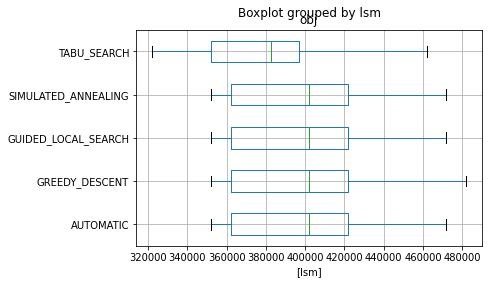

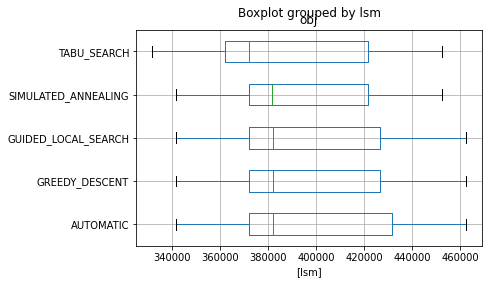

In [16]:
data[data.fss == 'PATH_MOST_CONSTRAINED_ARC'].boxplot('obj', by=['lsm'], vert=False)
data[data.fss == 'PATH_CHEAPEST_ARC'].boxplot('obj', by=['lsm'], vert=False)

instance
0    AxesSubplot(0.125,0.125;0.62x0.755)
1    AxesSubplot(0.125,0.125;0.62x0.755)
2    AxesSubplot(0.125,0.125;0.62x0.755)
3    AxesSubplot(0.125,0.125;0.62x0.755)
4    AxesSubplot(0.125,0.125;0.62x0.755)
dtype: object

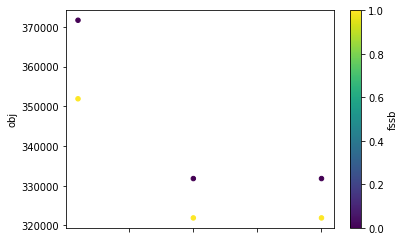

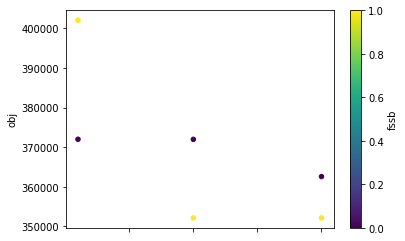

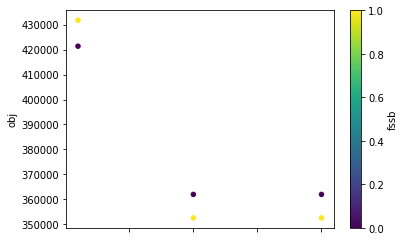

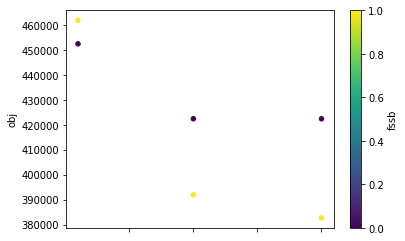

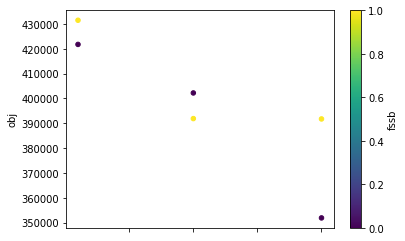

In [126]:
data2 = data[data.lsm == 'TABU_SEARCH']
#data2 = data2[data2.fss == 'PATH_MOST_CONSTRAINED_ARC']
data2['fssb'] = (data2.fss == 'PATH_MOST_CONSTRAINED_ARC').astype(int)
data2 = data2.groupby('instance')
data2.plot.scatter('tlim','obj', c='fssb', cmap='viridis')
